# Word Cloud Generation

In this notebook I use the wordcloud and matplotlib libraries to plot a word cloud for each language for each month


In [1]:
from tqdm.notebook import tqdm
from collections import defaultdict
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image
stopwords = set(STOPWORDS)

Load the flags

In [2]:
root = 'Data/Flags/'
if not os.access(root, os.R_OK):
    print("Check dataroot!!")

countryflags = {}
for i, country in enumerate(tqdm(os.listdir(root))):
    countryflags[country[:-4]] = np.array(Image.open(os.path.join(root, country)))

  0%|          | 0/6 [00:00<?, ?it/s]

Generates a word cloud with the flag as a mask

In [3]:
def save_wordcloud(data, title, mask):
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(str(data))

    # create coloring from image
    image_colors = ImageColorGenerator(mask)
    recolor = wordcloud.recolor(color_func=image_colors)
    plt.imshow(recolor, interpolation="bilinear")

    plt.axis('off')
    plt.savefig(fname='Output/' + title, dpi=300, bbox_inches='tight')

Join every day in a month into a single dataframe and then generate thw word cloud.

  0%|          | 0/6 [00:00<?, ?it/s]

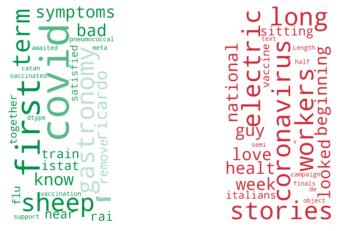

In [4]:
LanguageDataFrames = defaultdict(lambda: {'December':None, 'January':None, 'February':None, 'March':None, 'April':None, 'May':None})

languages = {
                1: 'en',
                2: 'es',
                3: 'fr',
                4: 'de',
                5: 'nl',
                6: 'it',
            }

for month in tqdm(['December', 'January', 'February', 'March', 'April', 'May']):
    for language in languages:
        daypaths = []
        for day in [0, 1, 2, 3, 4]:
                daypaths.append('Data/Analyzed Tweets/' + str(month) + str(day) + languages[language] + '.json')

        LanguageDataFrames[language][month] = pd.read_json(daypaths[0])
        for day in [1, 2, 3, 4]:
            LanguageDataFrames[language][month] = LanguageDataFrames[language][month].append(pd.read_json(daypaths[day]), ignore_index = True)

        data = LanguageDataFrames[language][month]['text']
        title = month + ' ' + languages[language] + ' word cloud'

        save_wordcloud(data, title, countryflags[languages[language]])

